In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import csv
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

from sklearn.cluster import KMeans

from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [ ]:
#Função de leitura dos dados------------------------------------
def read_class_data_2(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,-1]
    x = data[:,0:-1]
    return y,x

In [ ]:
def compute_info(Z,x,posY):
    m,_ = x.shape
    
    mu = np.mean(x[:,Z],axis=0).reshape((1,len(Z))) #Média geral
    Sb = np.zeros((len(Z),len(Z)))
    Sw = np.zeros((len(Z),len(Z)))
       
    for j in range(0,len(labY)):
        _x = x[posY[j],:]; _x = _x[:,Z]
        mu_j = np.mean(_x,axis=0).reshape((1,len(Z)))
        sig_j = np.cov(_x.T).reshape((len(Z),len(Z)))
        Sb += (len(posY[j])/m) * np.dot( (mu - mu_j).T,(mu - mu_j) )
        Sw += (len(posY[j])/m) * sig_j

    #return np.trace(Sb)/np.trace(Sw)
    return np.linalg.det(Sb+Sw)/np.linalg.det(Sw)

In [ ]:
def compute_info_gain_add(Z,W,x,posY):
    
    m,_ = x.shape

    vecJ = np.zeros(len(W))
    for at in range(len(W)):
        S = np.union1d(Z,W[at])
        S = np.int64(S).tolist()

        mu = np.mean(x[:,S],axis=0).reshape((1,len(S))) #Média geral
        Sb = np.zeros((len(S),len(S)))
        Sw = np.zeros((len(S),len(S)))

        for j in range(0,len(posY)):
            _x = x[posY[j],:]; _x = _x[:,S]
            mu_j = np.mean(_x,axis=0).reshape((1,len(S)))
            sig_j = np.cov(_x.T).reshape((len(S),len(S)))

            Sb += (len(posY[j])/m) * np.dot( (mu - mu_j).T,(mu - mu_j) )
            Sw += (len(posY[j])/m) * sig_j

        #vecJ[at] = np.trace(Sb)/np.trace(Sw)
        vecJ[at] = np.linalg.det(Sb+Sw)/np.linalg.det(Sw)
        
    return vecJ

In [ ]:
def compute_info_gain_remove(Z,x,posY):
    
    m,_ = x.shape

    vecJ = np.zeros(len(Z))
    for item in range(len(Z)):
        at = Z[item]

        S = Z.copy(); S.remove(at)

        mu = np.mean(x[:,S],axis=0).reshape((1,len(S))) #Média geral
        Sb = np.zeros((len(S),len(S)))
        Sw = np.zeros((len(S),len(S)))

        for j in range(0,len(posY)):
            _x = x[posY[j],:]; _x = _x[:,S]
            mu_j = np.mean(_x,axis=0).reshape((1,len(S)))
            sig_j = np.cov(_x.T).reshape((len(S),len(S)))

            Sb += (len(posY[j])/m) * np.dot( (mu - mu_j).T,(mu - mu_j) )
            Sw += (len(posY[j])/m) * sig_j

        #vecJ[item] = np.trace(Sb)/np.trace(Sw)
        vecJ[item] = np.linalg.det(Sb+Sw)/np.linalg.det(Sw)
   
    return vecJ

In [9]:
#-------------------------
np.random.seed(12346)
atributos = 60; agrupamentos = 10
x, y = make_blobs(n_features=atributos, centers=agrupamentos, n_samples=200)
x, y = make_classification(n_features=atributos, n_redundant=atributos-agrupamentos, n_informative=agrupamentos, n_clusters_per_class=2, n_classes=10, n_samples=200)

#Numero de atributos a ser selecionado
n_sel = 20

In [6]:
np.random.seed(0)
atributos = 40; agrupamentos = 15; redundante = 25
#x, y = make_blobs(n_features=atributos, centers=agrupamentos, n_samples=200)
x, y = make_classification(n_features=atributos, n_redundant=redundante, n_informative=atributos-redundante, n_clusters_per_class=np.int32((atributos-redundante)/agrupamentos), n_classes=agrupamentos, n_samples=1000)

#Numero de atributos a ser selecionado
n_sel = 19

#plt.plot(x[:,0],x[:,2],'ro')
#plt.show()


x, y = make_classification(n_features=40,n_redundant=25,n_informative=15,n_clusters_per_class=1,n_classes=15,n_samples=1000)


In [7]:
#path = '/home/rogerio/Desktop/Dados.RP/featureSelection/optdigits/optdigits.tra'
#y,x = read_class_data_2(path)
#n_sel = 10
#atributos = np.shape(x)[1]
#print(atributos)

## SFS

conf Z:  [34, 25, 38, 18, 31, 0, 10, 6, 5, 39, 32, 20, 27, 21, 36, 3, 4, 9, 30]
conf W:  [1, 2, 7, 8, 11, 12, 13, 14, 15, 16, 17, 19, 22, 23, 24, 26, 28, 29, 33, 35, 37]


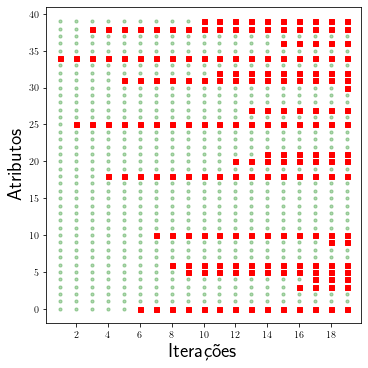

In [12]:
path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/exemploSFS.pdf'

#Geração das figuras
FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráfico 1
ax = fig.add_subplot(spec[0,0])
ax.set_xlabel('Iterações',fontsize=20)
ax.set_ylabel('Atributos',fontsize=20)
#ax.set_xticks([-1,1])
#ax.set_yticks([-1,1])

#Conjuntos de atributos: a ideia é passar de W para Z
W = [i for i in range(atributos)]
Z = []

#determina a posição de cada exemplo rotulado em x
labY ={}
for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

posIter = 1

while len(Z) < n_sel:
    ind = np.argmax( compute_info_gain_add(Z,W,x,labY) )
    #Z = np.union1d( Z,W[ind] )
    Z.append(W[ind])
    W.remove(W[ind]) 
    
    for el in W: ax.scatter(posIter,el,marker='o',c='green', s=10, alpha=0.3)
    for el in Z: ax.scatter(posIter,el,marker='s',c='red', s=25, alpha=1.0)

    posIter += 1

print('conf Z: ',Z)
print('conf W: ',W)

from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#plt.xlabel('Iteração',fontsize=15)
#plt.ylabel('Atributos',fontsize=15)

z1 = Z

plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')
plt.show()

## SBS

<ipython-input-5-fce74067f183>:24: RuntimeWarning: invalid value encountered in double_scalars
  vecJ[item] = np.linalg.det(Sb+Sw)/np.linalg.det(Sw)
<ipython-input-5-fce74067f183>:24: RuntimeWarning: divide by zero encountered in double_scalars
  vecJ[item] = np.linalg.det(Sb+Sw)/np.linalg.det(Sw)


conf Z:  [2, 4, 5, 6, 8, 9, 14, 15, 17, 19, 20, 24, 25, 27, 28, 30, 32, 34, 38]
conf W:  [0, 23, 26, 10, 3, 7, 22, 37, 29, 18, 11, 31, 36, 1, 12, 13, 21, 39, 35, 33, 16]


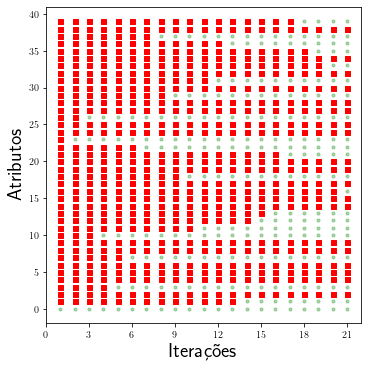

In [13]:
path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/exemploSBS.pdf'

#Geração das figuras
FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráfico 1
ax = fig.add_subplot(spec[0,0])
ax.set_xlabel('Iterações',fontsize=20)
ax.set_ylabel('Atributos',fontsize=20)

#Conjuntos de atributos: a ideia é passar de W para Z
W = []
Z = [i for i in range(atributos)]

#determina a posição de cada exemplo rotulado em x
labY ={}
for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

posIter = 1
while len(Z) > n_sel:
    
    #ind = np.argmin( compute_info_gain_remove(Z,x,labY) )   #???
    ind = np.argmax( compute_info_gain_remove(Z,x,labY) )  #argmax significa que ao remover, não fez muita diferença!
    W.append(Z[ind])
    Z.remove(Z[ind])
    
    for el in W: ax.scatter(posIter,el,marker='o',c='green', s=10, alpha=0.3)
    for el in Z: ax.scatter(posIter,el,marker='s',c='red', s=25, alpha=1.0)
    
    posIter += 1
    
print('conf Z: ',Z)
print('conf W: ',W)

z2 = Z

from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#ax.set_xticks([np.int32(np.linspace(1,atributos,atributos))])
#ax.set_yticks([np.int32(np.linspace(1,posIter-1,posIter-1))])

plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')
plt.show()

## SFFS

entrou 34 card. 1
entrou 25 card. 2
entrou 38 card. 3
entrou 18 card. 4
entrou 31 card. 5
entrou 0 card. 6
entrou 10 card. 7
entrou 6 card. 8
entrou 5 card. 9
entrou 39 card. 10
entrou 32 card. 11
entrou 20 card. 12
entrou 27 card. 13
entrou 21 card. 14
entrou 36 card. 15
entrou 3 card. 16
saiu 25 card. 15
saiu 39 card. 14
entrou 11 card. 15
entrou 33 card. 16
entrou 13 card. 17
saiu 18 card. 16
saiu 10 card. 15
entrou 4 card. 16
entrou 12 card. 17
entrou 14 card. 18
saiu 3 card. 17
saiu 5 card. 16
entrou 2 card. 17
saiu 6 card. 16
entrou 10 card. 17
entrou 19 card. 18
saiu 34 card. 17
saiu 13 card. 16
saiu 4 card. 15
saiu 31 card. 14
saiu 12 card. 13
saiu 36 card. 12
saiu 14 card. 11
entrou 22 card. 12
entrou 35 card. 13
entrou 1 card. 14
entrou 37 card. 15
entrou 12 card. 16
entrou 4 card. 17
saiu 0 card. 16
entrou 0 card. 17
saiu 33 card. 16
entrou 33 card. 17
entrou 36 card. 18
saiu 32 card. 17
saiu 0 card. 16
saiu 21 card. 15
saiu 27 card. 14
saiu 11 card. 13
saiu 2 card. 12
saiu 

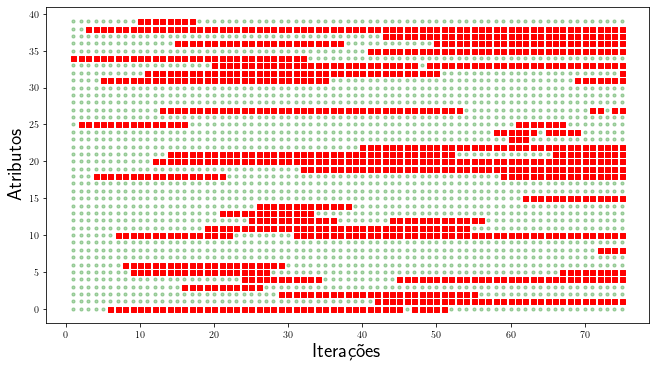

In [11]:
path_out = '/home/rogerio/GIT/rp/blucher/figs/CapRDSA/exemploSFFS.pdf'

#Geração das figuras
FS = (9,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráfico 1
ax = fig.add_subplot(spec[0,0])
ax.set_xlabel('Iterações',fontsize=20)
ax.set_ylabel('Atributos',fontsize=20)

#Conjuntos de atributos: a ideia é passar de W para Z
W = [i for i in range(atributos)]
Z = []

posIter = 1

#determina a posição de cada exemplo rotulado em x
labY ={}
for i in np.unique(y):
    pos = np.where(y == i)
    labY[i] = (pos[0]).tolist()

while len(Z) < n_sel:
    
    indAdd = np.argmax( compute_info_gain_add(Z,W,x,labY) )
    Z.append(W[indAdd])
    print('entrou',W[indAdd],'card.',len(Z))
    W.remove(W[indAdd])
    
    for el in W: ax.scatter(posIter,el,marker='o',c='green', s=10, alpha=0.3)
    for el in Z: ax.scatter(posIter,el,marker='s',c='red', s=25, alpha=1.0)
    posIter += 1

    Jadd = compute_info(Z,x,labY)

    while True:
        
        if (len(Z) <= 1) or (len(Z) == n_sel): break
        indRem = np.argmax( compute_info_gain_remove(Z,x,labY) )
    
        tempZ = Z.copy(); tempZ.remove(Z[indRem])
        Jrem = compute_info(tempZ,x,labY)

        if (Jrem < Jadd) or (Z[-1] == Z[indRem]): break
        else: 
            #indAdd = -1 #Garante comparação válida só no 1o loop
            print('saiu',Z[indRem],'card.',len(Z)-1)
            W.append(Z[indRem])
            Z.remove(Z[indRem])            
            
            for el in W: ax.scatter(posIter,el,marker='o',c='green', s=10, alpha=0.3)
            for el in Z: ax.scatter(posIter,el,marker='s',c='red', s=25, alpha=1.0)
            posIter += 1
            
    #posIter += 1

print('Atributos selecionados: ',Z)
selAtributos = np.int64(Z) #compatibilização do tipo

plt.savefig(path_out, dpi=300, bbox_inches='tight', format='pdf')
plt.show()

In [12]:
print(np.sort(Z))
print(np.sort(z1))
print(np.sort(z2))


[ 4  5  7  9 11 12 18 20 33 34 39 42 43 44 47 49 51 53 57 58]
[ 4  5  7  9 11 12 18 20 33 34 39 42 43 44 47 49 51 53 57 58]
[ 4  5  7  9 11 12 17 18 20 33 38 39 42 43 44 47 49 53 57 58]


In [96]:
print(x.shape[0])

200


In [83]:
zinter = np.intersect1d(z1,z2)
print(z1)
print(z2)

[ 4.  5.  9. 10. 11. 12. 17. 18. 20. 23. 26. 28. 31. 33. 37. 38. 39. 41.
 42. 43. 44. 46. 47. 49. 51. 53. 55. 56. 57. 58.]
[4, 5, 9, 10, 11, 12, 17, 18, 20, 23, 26, 28, 31, 33, 37, 38, 39, 41, 42, 43, 44, 46, 47, 49, 51, 53, 55, 56, 57, 58]


In [84]:
print(zinter)
print(len(zinter))

[ 4.  5.  9. 10. 11. 12. 17. 18. 20. 23. 26. 28. 31. 33. 37. 38. 39. 41.
 42. 43. 44. 46. 47. 49. 51. 53. 55. 56. 57. 58.]
30


In [44]:
print(z2)

[2, 4, 6, 7, 8, 9, 11, 12, 15, 16, 18, 19, 20, 21, 22, 26, 28, 32, 34, 38, 40, 42, 46, 48, 51, 52, 53, 55, 57, 58]


In [28]:
z1 = [ 3,  5,  6,  7,  8,  9, 10, 11, 12, 16, 17, 18, 19, 23, 28, 31, 35, 36, 38, 43, 44, 45, 47, 51, 53, 55, 56, 57, 58, 59]
z2 = [0, 1, 2, 4, 5, 13, 14, 15, 20, 21, 22, 24, 25, 26, 29, 30, 32, 33, 34, 37, 40, 41, 42, 45, 46, 48, 49, 50, 52, 54]

In [42]:
np.shape(z1)

(30,)